##### Importing the required libraries 

In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Setting display max rows and columns to None to view all the data in the dataframe

In [714]:
pd.set_option("display.max_rows", None)

In [715]:
pd.set_option("display.max_columns", None)

#### Reading the csv file  

In [716]:
lcc=  pd.read_csv("D:\\Upgrad\\Lending Club Case study\\Data\\loan\\loan.csv")

#### Checking the shape, info and data type of the dataframe

In [717]:
lcc.shape

(39717, 111)

In [718]:
lcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [719]:
lcc.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

#### Checking null value count in Rows

In [720]:
lcc.isnull().all(axis=1).sum()

0

#### Checking null value count in Columns

In [721]:
lcc.isnull().all(axis=0).sum()

54

#### Checking how many values are null in a particular column

In [722]:
lcc.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Data Cleaning

#### Dropping columns where all the values are null

In [723]:
lcc.drop(lcc.iloc[:,54:105], axis=1, inplace=True)

In [724]:
lcc.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2459
emp_length                      1075
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12940
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
i

In [725]:
col_drop=["mths_since_last_major_derog","annual_inc_joint","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]

In [726]:
lcc.drop(labels=col_drop , axis=1, inplace=True)

In [727]:
lcc.shape

(39717, 54)

In [728]:
lcc.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Dropping the columns where majority of values are null or the values are same as it wont be helpful in data analysis
1. tax_liens: mostly 0 or null
2. policy_code: all value are 1
3. application_type: all values are 'Individual'
4. collections_12_mths_ex_med : all the values are 0 
5. next_pymnt_d : maximum values are null
6. mths_since_last_record: maximum values are null


In [729]:
col_drop1 = ["tax_liens", "policy_code", "application_type","collections_12_mths_ex_med","next_pymnt_d","mths_since_last_record"]

In [730]:
lcc.drop(labels= col_drop1, axis=1, inplace = True)

In [731]:
lcc.shape

(39717, 48)

In [732]:
lcc.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec   

#### Dropping few more columns which will not be helpful for data analysis
1. zip_code: another field state is available which can be used for the analysis
2. emp_title:more than 60 % of data is unique
3. url:-one unique identifier(id column) is enough for a data set

In [733]:
col_drop2 = ["url","zip_code","emp_title"]

In [734]:
lcc.drop(labels= col_drop2, axis=1, inplace = True)

In [735]:
lcc.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
desc                       12940
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc 

#### Dropping few more columns 
1. mths_since_last_delinq: majority of values are null , 
2. desc: long texts, similar inference can be drawn from purpose column
3. title: similar inference can be drawn from purpose column
4. initial_list_status: value is same for all, not helpful in the data analysis 
5. pymnt_plan: value is same for all,  not helpful in the data analysis 
6. member_id:  one unique identifier (id) column is good enough for the data set. Hence dropping member_id column

In [736]:
col_drop3=["mths_since_last_delinq", "desc"]

In [737]:
lcc.drop(labels= col_drop3, axis=1, inplace = True)

In [738]:
lcc.drop(labels= "member_id", axis=1, inplace = True)

In [739]:
col_drop4=["initial_list_status", "pymnt_plan","title"]

In [740]:
lcc.drop(labels=col_drop4, axis=1, inplace= True)

In [741]:
lcc.shape

(39717, 39)

#### Exporting Data to csv

In [742]:
lcc.to_csv("D:\\Upgrad\\Lending Club Case study\\Data\\loan\\loan_updated.csv")

#### Removing the % symbol from "int_rate" and "revol_util" columns

In [743]:
lcc["revol_util"]= lcc['revol_util'].str.replace('%','')

In [744]:
lcc['int_rate'] = lcc['int_rate'].str.replace('%','')

In [745]:
lcc.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0


#### Replacing Null values with 0 for emp_length column

In [746]:
lcc.emp_length.isnull().sum()

1075

In [747]:
lcc.emp_length.fillna("0 years", inplace= True)

In [748]:
lcc.emp_length.isnull().sum()

0

In [749]:
lcc.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
5          3 years
6          8 years
7          9 years
8          4 years
9         < 1 year
10         5 years
11       10+ years
12        < 1 year
13         3 years
14         3 years
15        < 1 year
16         4 years
17       10+ years
18          1 year
19         6 years
20         3 years
21       10+ years
22       10+ years
23         5 years
24          1 year
25         2 years
26         9 years
27         2 years
28       10+ years
29        < 1 year
30         7 years
31         5 years
32         2 years
33         2 years
34         7 years
35       10+ years
36         2 years
37          1 year
38          1 year
39          1 year
40         4 years
41       10+ years
42         9 years
43       10+ years
44       10+ years
45         6 years
46       10+ years
47         6 years
48       10+ years
49         5 years
50         8 years
51         9 years
52        < 

### Univariate Analysis

#### Dependent variable loan_status - Looking at the count of Fully paid, Charged off and Current data 

#### Univariate analysis on Loan status(Continuous variable)

Text(0, 0.5, 'Count')

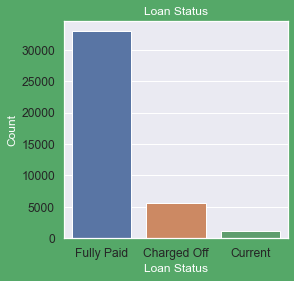

In [750]:
plt.figure(figsize=(4,4),facecolor='g')

ax = sns.countplot(x="loan_status",data=lcc,)
ax.set_title('Loan Status',fontsize=12,color='w')
ax.set_xlabel('Loan Status',fontsize=12,color = 'w')
ax.set_ylabel('Count',fontsize=12,color = 'w')

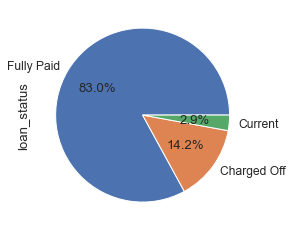

In [751]:
lcc.loan_status.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

#### Charged Off data comprises of 14 % of the complete data set

#### Univariate Analysis of loan amount(Continuous variable)

In [752]:
lcc.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

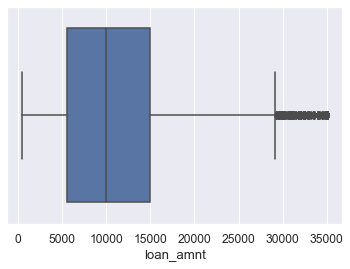

In [753]:
sns.boxplot(lcc.loan_amnt)
plt.show()

#### Univariate analysis on annual income of the individual(Continuous variable)

In [754]:
lcc.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [755]:
lcc.annual_inc.dtypes

dtype('float64')

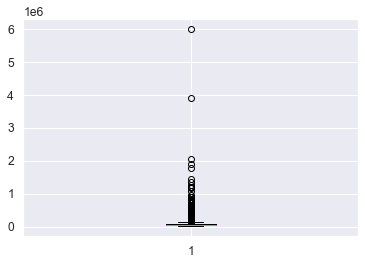

In [756]:
plt.boxplot(lcc.annual_inc)
plt.show()

##### Remove outliers from annual income

In [757]:
lcc = lcc[lcc["annual_inc"] < lcc["annual_inc"].quantile(0.99)]

In [758]:
lcc.annual_inc.describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

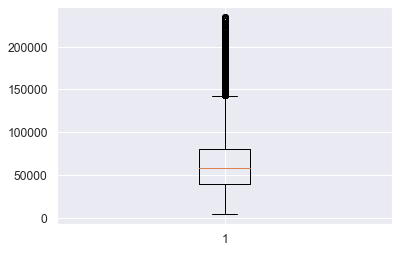

In [759]:
plt.boxplot(lcc.annual_inc)
plt.show()

#### Univariate analysis on interest rate(Continuous variable)

In [760]:
lcc.int_rate= lcc.int_rate.apply(pd.to_numeric)

In [761]:
lcc.int_rate.describe()

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

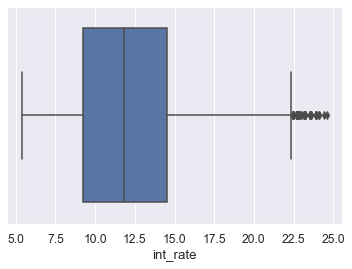

In [762]:
sns.boxplot(lcc.int_rate)
plt.show()

#### Univariate analysis on home ownership(unordered categorical varaible)

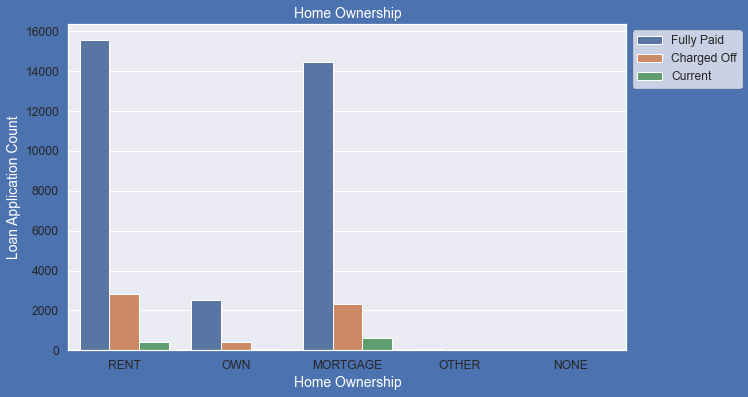

In [763]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=lcc,hue='loan_status')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#### From the above graph we can understand than applicants having own house are more likely to pay the loan than applicants having a rented house or mortgage

#### Analysing the impact of term on loan status (Ordered Categorical Variable)

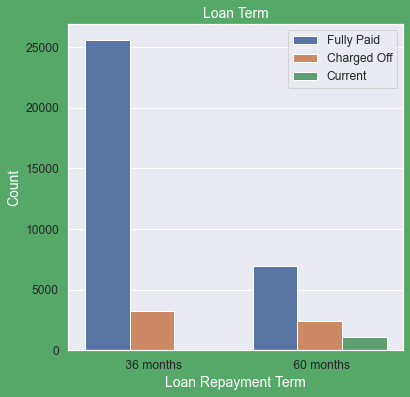

In [764]:
plt.figure(figsize=(6,6),facecolor='g')
ax = sns.countplot(x="term",data=lcc,hue='loan_status')
ax.set_title('Loan Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### If we consider the number of applicants in 36th months and 60 months, the applicants in 60 months term are more likely to be charged off because the charged off proportion of individuals in 60 months term is more as compared to 36 month

### Segmented Univariate analysis

#### Checking the Median value of loan_amnt and funded amount for fully paid and charged off(Continuous Variables)

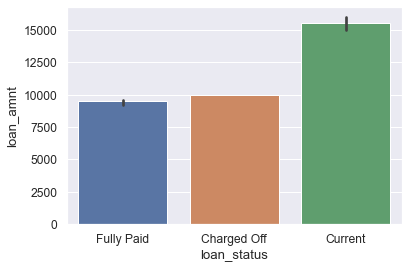

In [765]:
sns.barplot(data = lcc, x = 'loan_status', y = 'loan_amnt', estimator = np.median)
plt.show()

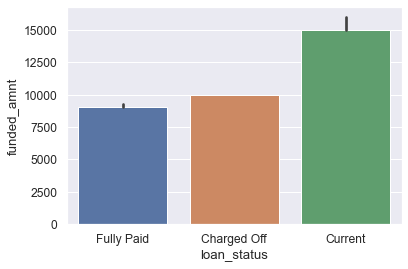

In [766]:
sns.barplot(data = lcc, x = 'loan_status', y = 'funded_amnt', estimator = np.median)
plt.show()

##### There is No significant difference in the median values of loan amount of Fully paid and Charged off 

##### There is a slight difference in the median values of loan amount of Fully paid and Charged off 

#### Analysing the impact of installment(Continuous Variable) on loan_status

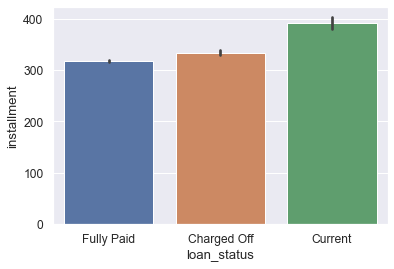

In [767]:
sns.barplot(data = lcc, x = 'loan_status', y = 'installment', estimator = np.mean)
plt.show()

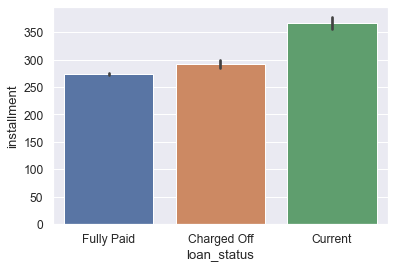

In [768]:
sns.barplot(data = lcc, x = 'loan_status', y = 'installment', estimator = np.median)
plt.show()

#### No significant difference in the mean and median values of the installment amount hence it may not be an impacting variable for loan status

#### Analysing the impact of interest rate(Continuous Variable) on the loan status

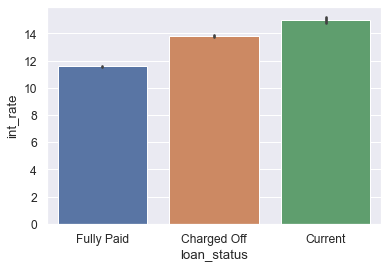

In [769]:
sns.barplot(data = lcc, x = 'loan_status', y = 'int_rate', estimator = np.mean)
plt.show()

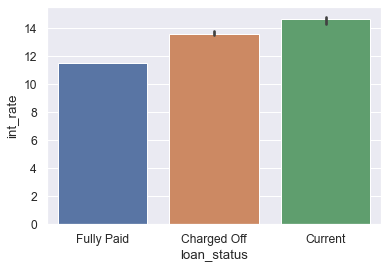

In [770]:
sns.barplot(data = lcc, x = 'loan_status', y = 'int_rate', estimator = np.median)
plt.show()

#### From the above graphs we can understand that applicants with high interest rates are likely to be in the charged off category since there is a significant increase in the mean and median values of charged off individuals

#### Analysing the impact of dti(continuous variable) and loan status

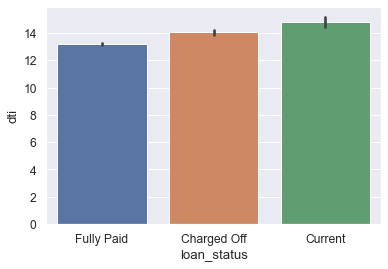

In [771]:
sns.barplot(data = lcc, x = 'loan_status', y = 'dti', estimator = np.mean)
plt.show()

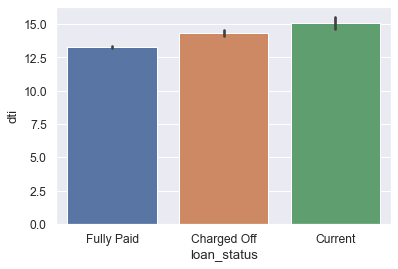

In [772]:
sns.barplot(data = lcc, x = 'loan_status', y = 'dti', estimator = np.median)
plt.show()

#### From the above graph we can understand that the dti of chrged off individuals are slightly more as compared to Fully paid. But there is no major difference

#### Analysing the impact of revol_util on loan_status

In [773]:
lcc.revol_util= lcc.revol_util.apply(pd.to_numeric) 

In [774]:
lcc.revol_util.dtypes

dtype('float64')

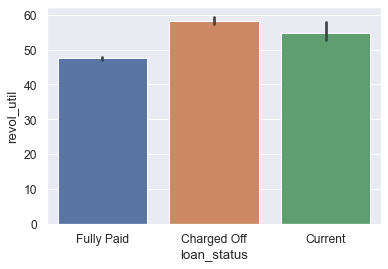

In [775]:
sns.barplot(data = lcc, x = 'loan_status', y = 'revol_util', estimator = np.median)
plt.show()

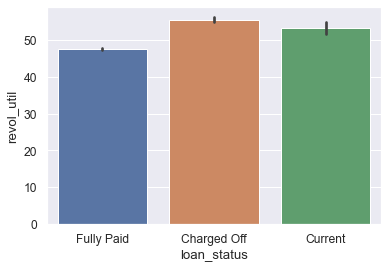

In [776]:

sns.barplot(data = lcc, x = 'loan_status', y = 'revol_util', estimator = np.mean)
plt.show()


#### From the above graph we can understand that the revolving utilization percentage mean and median values are slightly higher , hence it can be said that individuals with high revolving utilization rate tend to charge off the loan amount

### Creating a correlation marix

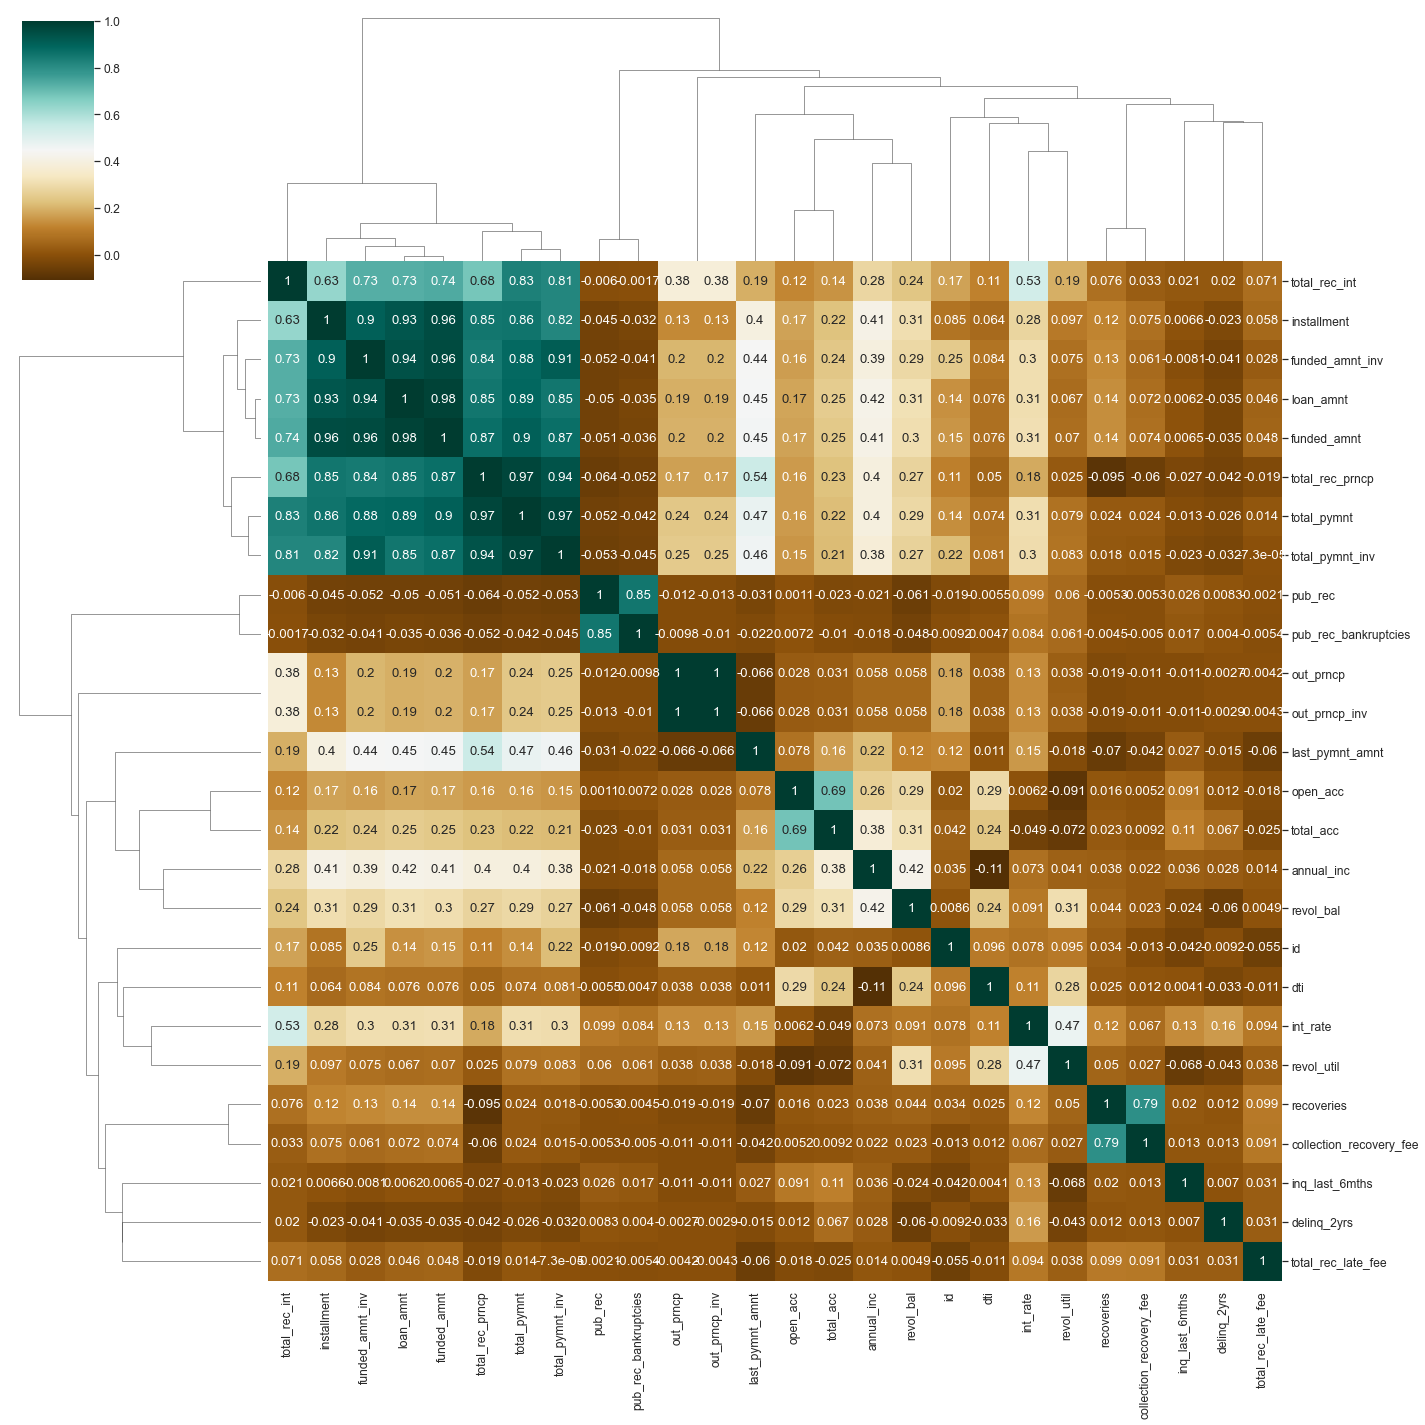

In [777]:
loan_correlation = lcc.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(20, 20),cmap="BrBG")
plt.show()

#### 
1. annual_inc and dti are highly correlated(negatively)
2. recoveries and is highly correlated with total_rec_prncp (negatively)
3. total_rec_prncp is negatively correlated with recoveries and collection_recovery_ fee
4. revol_bal is negatively correlated with pub_rec
5. total_rec_int,installment, funded_amnt_inv, funded_amnt, loan_amnt, total_rec_prncp, total_payment, total_payment_inv are positively correlated with each other and negatively correlated with pub_rec and total_rec_late_fee


#### Creating correlation matrix of subsets

In [778]:
lcc_subset1=lcc[['total_rec_int','installment','loan_amnt','funded_amnt','funded_amnt_inv','total_rec_prncp','total_pymnt','total_pymnt_inv','pub_rec','pub_rec_bankruptcies','revol_bal','total_rec_late_fee']]


In [779]:
lcc_subset1.head()

,total_rec_int,installment,loan_amnt,funded_amnt,funded_amnt_inv,total_rec_prncp,total_pymnt,total_pymnt_inv,pub_rec,pub_rec_bankruptcies,revol_bal,total_rec_late_fee
0,863.16,162.87,5000,5000,4975.0,5000.00,5863.155187,5833.84,0,0.0,13648,0.00
1,435.17,59.83,2500,2500,2500.0,456.46,1008.710000,1008.71,0,0.0,1687,0.00
2,605.67,84.33,2400,2400,2400.0,2400.00,3005.666844,3005.67,0,0.0,2956,0.00
3,2214.92,339.31,10000,10000,10000.0,10000.00,12231.890000,12231.89,0,0.0,5598,16.97
4,1037.39,67.79,3000,3000,3000.0,2475.94,3513.330000,3513.33,0,0.0,27783,0.00


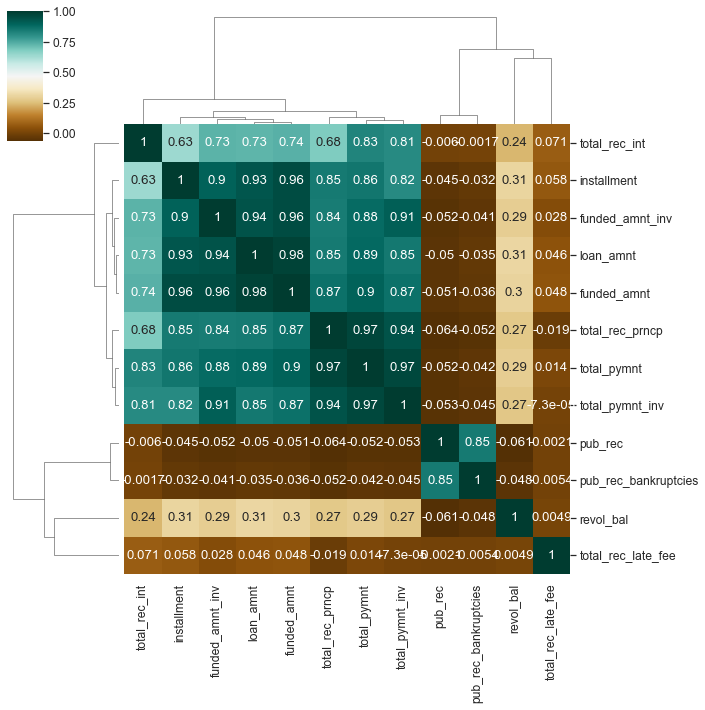

In [780]:
loan_correlation = lcc_subset1.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(10,10),cmap="BrBG")
plt.show()

In [781]:
lcc_subset2= lcc[['out_prncp','out_prncp_inv','annual_inc','dti','recoveries','collection_recovery_fee','total_rec_prncp','last_pymnt_amnt']]

In [782]:
lcc_subset2.head()

,out_prncp,out_prncp_inv,annual_inc,dti,recoveries,collection_recovery_fee,total_rec_prncp,last_pymnt_amnt
0,0.00,0.00,24000.0,27.65,0.00,0.00,5000.00,171.62
1,0.00,0.00,30000.0,1.00,117.08,1.11,456.46,119.66
2,0.00,0.00,12252.0,8.72,0.00,0.00,2400.00,649.91
3,0.00,0.00,49200.0,20.00,0.00,0.00,10000.00,357.48
4,524.06,524.06,80000.0,17.94,0.00,0.00,2475.94,67.79


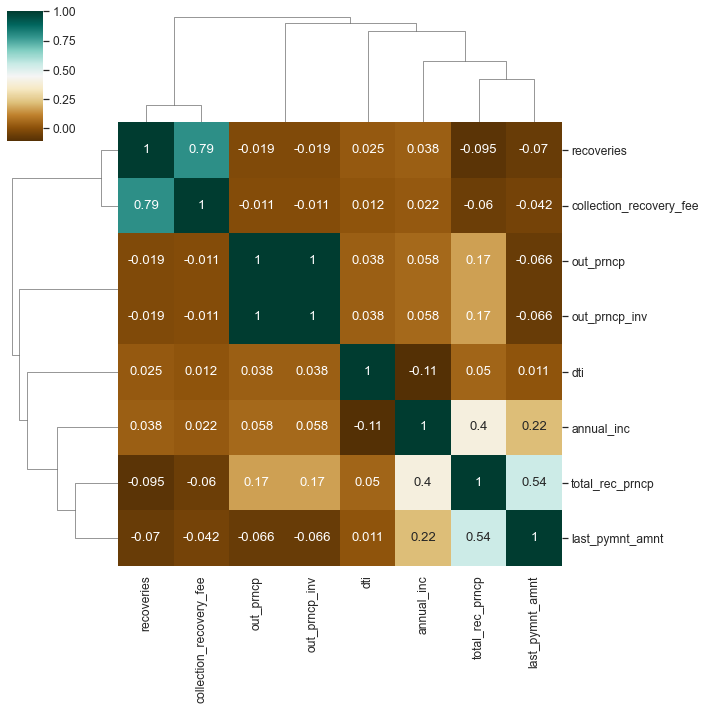

In [783]:
loan_correlation = lcc_subset2.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(10,10),cmap="BrBG")
plt.show()

### Bivariate Analysis

#### Analysing the impact of grade on loan status

In [784]:
grade_n_loan_status = lcc.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()


In [785]:
grade_n_loan_status

loan_status,grade,Charged Off,Current,Fully Paid
0,A,601,40,9377
1,B,1414,344,10167
2,C,1342,262,6411
3,D,1112,216,3916
4,E,704,176,1906
5,F,312,71,642
6,G,99,17,190


In [786]:
grade_n_loan_status['Total'] = grade_n_loan_status['Charged Off'] + grade_n_loan_status['Current'] + grade_n_loan_status['Fully Paid'] 


In [787]:
grade_n_loan_status['Charged_off_Proportion'] = grade_n_loan_status['Charged Off'] / grade_n_loan_status['Total']

In [788]:
grade_n_loan_status['Charged_off_Percentage'] = (grade_n_loan_status['Charged Off'] / grade_n_loan_status['Total'])*100

In [789]:
grade_n_loan_status

loan_status,grade,Charged Off,Current,Fully Paid,Total,Charged_off_Proportion,Charged_off_Percentage
0,A,601,40,9377,10018,0.059992,5.999201
1,B,1414,344,10167,11925,0.118574,11.857442
2,C,1342,262,6411,8015,0.167436,16.743606
3,D,1112,216,3916,5244,0.212052,21.205187
4,E,704,176,1906,2786,0.252692,25.269203
5,F,312,71,642,1025,0.304390,30.439024
6,G,99,17,190,306,0.323529,32.352941


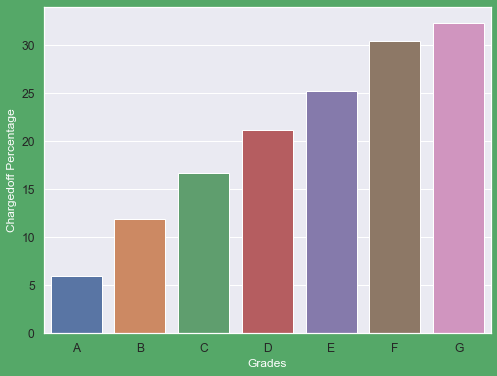

In [796]:
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='g')
ax.set_title('Grades vs Chargedoff Percentage',fontsize=6,color='w')
ax=sns.barplot(x='grade', y='Charged_off_Percentage', data=grade_n_loan_status)
ax.set_xlabel('Grades',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Percentage',fontsize=12,color ='w')
plt.show()



#### From the above graph we can understand that proportion of applicants belonging to Grade G and F are more likely to be charged off

#### Analysing the impact of sub grade on loan status 

In [797]:
subgrade_n_loan_status = lcc.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()


In [798]:
subgrade_n_loan_status

loan_status,sub_grade,Charged Off,Current,Fully Paid
0,A1,30.0,0.0,1102.0
1,A2,74.0,0.0,1425.0
2,A3,103.0,0.0,1696.0
3,A4,178.0,13.0,2676.0
4,A5,216.0,27.0,2478.0
5,B1,170.0,33.0,1616.0
6,B2,225.0,56.0,1753.0
7,B3,335.0,92.0,2457.0
8,B4,328.0,74.0,2097.0
9,B5,356.0,89.0,2244.0


In [799]:
subgrade_n_loan_status['Total'] = subgrade_n_loan_status['Charged Off'] + subgrade_n_loan_status['Current'] + subgrade_n_loan_status['Fully Paid'] 


In [800]:
subgrade_n_loan_status['Charged_off_Percentage'] = (subgrade_n_loan_status['Charged Off'] / subgrade_n_loan_status['Total'])*100

In [801]:
subgrade_n_loan_status.head()

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Charged_off_Percentage
0,A1,30.0,0.0,1102.0,1132.0,2.650177
1,A2,74.0,0.0,1425.0,1499.0,4.936624
2,A3,103.0,0.0,1696.0,1799.0,5.725403
3,A4,178.0,13.0,2676.0,2867.0,6.208580
4,A5,216.0,27.0,2478.0,2721.0,7.938258


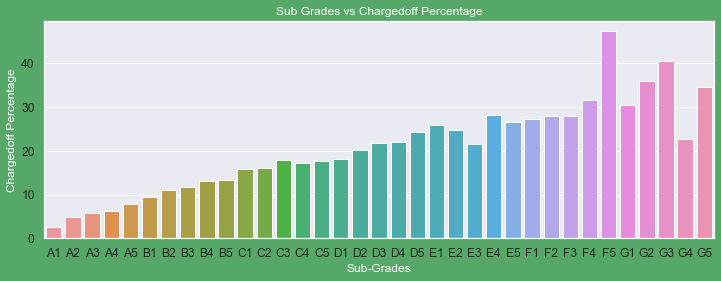

In [802]:
fig, ax = plt.subplots(figsize=(12, 4),facecolor='g')
ax.set_title('Sub Grades vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='sub_grade', y='Charged_off_Percentage', data=subgrade_n_loan_status)
ax.set_xlabel('Sub-Grades',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Percentage',fontsize=12,color ='w')
plt.show()


#### From the above graph we can understand that the proportion of applicants belonging to sub-grade F and G are more likely to be charged off

#### Analysing the impact of Employment length on loan status

In [803]:
emplen_n_loan_status = lcc.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [804]:
emplen_n_loan_status

loan_status,emp_length,Charged Off,Current,Fully Paid
0,0 years,227,42,801
1,1 year,455,69,2689
2,10+ years,1316,386,7038
3,2 years,561,97,3684
4,3 years,551,82,3426
5,4 years,456,94,2860
6,5 years,456,87,2712
7,6 years,305,58,1846
8,7 years,262,62,1435
9,8 years,203,43,1216


In [805]:
emplen_n_loan_status['Total'] = emplen_n_loan_status['Charged Off'] + emplen_n_loan_status['Current'] + emplen_n_loan_status['Fully Paid'] 


In [806]:
emplen_n_loan_status['Charged_off_Percentage'] = (emplen_n_loan_status['Charged Off'] / emplen_n_loan_status['Total'])*100

In [807]:
emplen_n_loan_status.head()

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Charged_off_Percentage
0,0 years,227,42,801,1070,21.214953
1,1 year,455,69,2689,3213,14.161220
2,10+ years,1316,386,7038,8740,15.057208
3,2 years,561,97,3684,4342,12.920313
4,3 years,551,82,3426,4059,13.574772


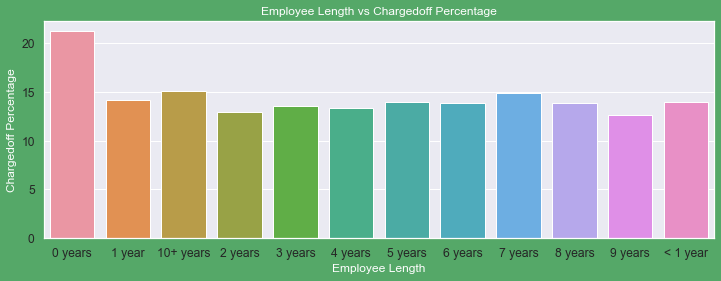

In [808]:
fig, ax = plt.subplots(figsize=(12, 4),facecolor='g')
ax.set_title('Employee Length vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='emp_length', y='Charged_off_Percentage', data=emplen_n_loan_status)
ax.set_xlabel('Employee Length',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Percentage',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that applicants with less experience ar no experiece are more likely to be charged off

#### Analysing the impact of purpose on loan status

In [809]:
purpose_n_loan = lcc.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_n_loan['Total'] = purpose_n_loan['Charged Off'] + purpose_n_loan['Current'] + purpose_n_loan['Fully Paid'] 
purpose_n_loan['Chargedoff_Percentage'] = (purpose_n_loan['Charged Off'] / purpose_n_loan['Total'])*100

In [810]:
purpose_n_loan.head(2)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,car,160.0,50.0,1332.0,1542.0,10.376135
1,credit_card,537.0,102.0,4450.0,5089.0,10.552171


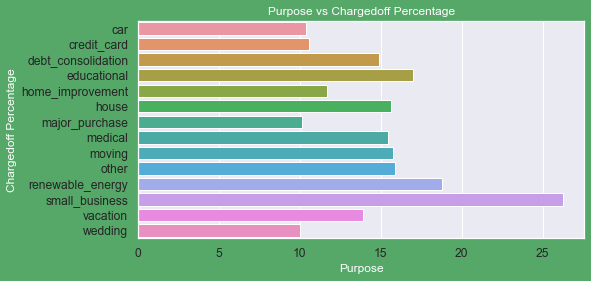

In [811]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('Purpose vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='Chargedoff_Percentage', y='purpose', data=purpose_n_loan)
ax.set_xlabel('Purpose',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Percentage',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that loan opted for "Small Business" are more likely to be charged off 

#### Analysing the impact of annual income and Loan status

In [812]:
lcc['annual_inc_range'] = pd.cut(lcc['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [813]:
annual_inc_n_loan = lcc.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_n_loan['Total'] = annual_inc_n_loan['Charged Off'] + annual_inc_n_loan['Current'] + annual_inc_n_loan['Fully Paid'] 
annual_inc_n_loan['Chargedoff_Percentage'] = (annual_inc_n_loan['Charged Off'] / annual_inc_n_loan['Total'])*100

In [814]:
annual_inc_n_loan.head(2)

loan_status,annual_inc_range,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,0-20000,237,9,943,1189,19.932717
1,20000-40000,1514,170,7004,8688,17.426335


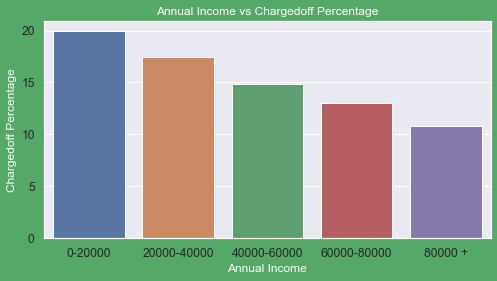

In [815]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('Annual Income vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='annual_inc_range', y='Chargedoff_Percentage', data=annual_inc_n_loan)
ax.set_xlabel('Annual Income',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Percentage',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that the applicants with low annual income are more likely to be charged off 

#### Analysing the relation between delinq_2yrs and loan status

In [816]:
delinq_2yrs_n_loan = lcc.groupby(['delinq_2yrs', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
delinq_2yrs_n_loan['Total'] = delinq_2yrs_n_loan['Charged Off'] + delinq_2yrs_n_loan['Current'] + delinq_2yrs_n_loan['Fully Paid'] 
delinq_2yrs_n_loan['Chargedoff_Percentage'] = (delinq_2yrs_n_loan['Charged Off'] / delinq_2yrs_n_loan['Total'])*100

In [817]:
delinq_2yrs_n_loan.head()

loan_status,delinq_2yrs,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,0,4899.0,1007.0,29170.0,35076.0,13.966815
1,1,503.0,94.0,2658.0,3255.0,15.453149
2,2,128.0,14.0,530.0,672.0,19.047619
3,3,35.0,8.0,173.0,216.0,16.203704
4,4,13.0,2.0,45.0,60.0,21.666667


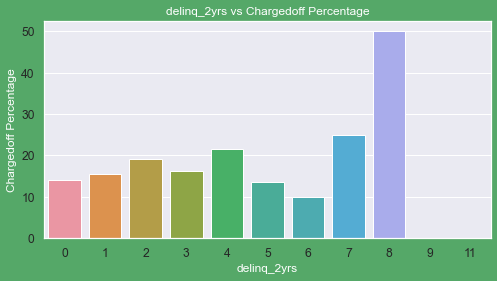

In [818]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('delinq_2yrs vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='delinq_2yrs', y='Chargedoff_Percentage', data=delinq_2yrs_n_loan)
ax.set_xlabel('delinq_2yrs',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Percentage',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that although there is a significantly high charged off percentage with delinq value 8 , there is no proper trend to derive any conclusion . Hence it may not be an high impacting variable on loan status

#### Analysing the impact of pub_rec and loan status

In [819]:
pub_rec_n_loan = lcc.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_n_loan['Total'] = pub_rec_n_loan['Charged Off'] + pub_rec_n_loan['Current'] + pub_rec_n_loan['Fully Paid'] 
pub_rec_n_loan['Chargedoff_Percentage'] = (pub_rec_n_loan['Charged Off'] / pub_rec_n_loan['Total'])*100

In [820]:
pub_rec_n_loan.head(8)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,0,5120.0,1080.0,31012.0,37212.0,13.759002
1,1,454.0,43.0,1551.0,2048.0,22.167969
2,2,10.0,3.0,37.0,50.0,20.000000
3,3,0.0,0.0,7.0,7.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


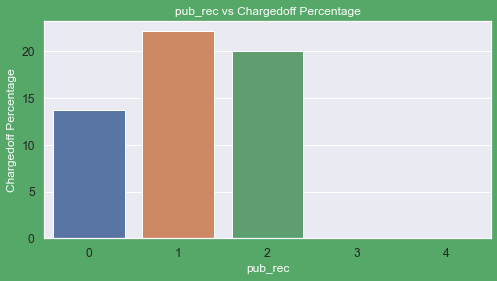

In [821]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('pub_rec vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='pub_rec', y='Chargedoff_Percentage', data=pub_rec_n_loan)
ax.set_xlabel('pub_rec',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Percentage',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that no significant conclusion can be drawn since the charged off percentage is more for pub_rec value 1

#### Analysing the impact of revol_bal on loan_status

In [822]:
lcc['revolving_bal_range'] = pd.cut(lcc['revol_bal'], [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000], labels=['0-10000','10000-20000', '20000-30000','30000-40000','40000-50000', '50000-60000','60000-70000', '70000-80000', '80000-90000','90000-100000','100000-110000','110000-120000','120000-130000','130000-140000','140000-150000'])

In [823]:
revolving_bal_n_loan = lcc.groupby(['revolving_bal_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
revolving_bal_n_loan['Total'] = revolving_bal_n_loan['Charged Off'] + revolving_bal_n_loan['Current'] + revolving_bal_n_loan['Fully Paid'] 
revolving_bal_n_loan['Chargedoff_Percentage'] = (revolving_bal_n_loan['Charged Off'] / revolving_bal_n_loan['Total'])*100

In [824]:
revolving_bal_n_loan.head()

loan_status,revolving_bal_range,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,0-10000,2820,435,17315,20570,13.709285
1,10000-20000,1477,354,8353,10184,14.503142
2,20000-30000,600,178,3199,3977,15.086749
3,30000-40000,229,60,1303,1592,14.384422
4,40000-50000,145,38,578,761,19.053876


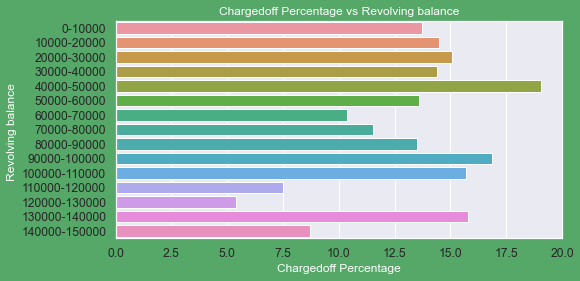

In [826]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('Chargedoff Percentage vs Revolving balance',fontsize=12,color='w')
ax=sns.barplot(x='Chargedoff_Percentage', y='revolving_bal_range', data=revolving_bal_n_loan)
ax.set_xlabel('Chargedoff Percentage',fontsize=12,color='w')
ax.set_ylabel('Revolving balance ',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that the applicants with revolving balance range 40000-50000 are showing a high rate of charged off . But since there is no proper trend .This might not be a variable impacting the loan status

#### Analysing the impact of total open accounts on loan amount

In [827]:
open_acc_n_loan = lcc.groupby(['open_acc', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
open_acc_n_loan['Total'] = open_acc_n_loan['Charged Off'] + open_acc_n_loan['Current'] + open_acc_n_loan['Fully Paid'] 
open_acc_n_loan['Chargedoff_Percentage'] = (open_acc_n_loan['Charged Off'] / open_acc_n_loan['Total'])*100


In [828]:
open_acc_n_loan.head()

loan_status,open_acc,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,2,124.0,9.0,468.0,601.0,20.632280
1,3,257.0,23.0,1205.0,1485.0,17.306397
2,4,362.0,43.0,1928.0,2333.0,15.516502
3,5,424.0,72.0,2670.0,3166.0,13.392293
4,6,543.0,100.0,3276.0,3919.0,13.855575


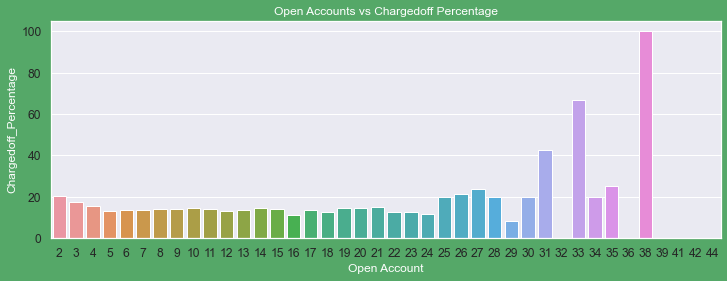

In [829]:
fig, ax = plt.subplots(figsize=(12, 4),facecolor='g')
ax.set_title('Open Accounts vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='open_acc', y='Chargedoff_Percentage', data=open_acc_n_loan)
ax.set_xlabel('Open Account',fontsize=12,color='w')
ax.set_ylabel('Chargedoff_Percentage',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that there is a increase in charged off percentage of people having more open accounts. But the increase is not consistent.Hence it may not be a impacting variable for loan status

#### Analysing the impact of late fee on loan status

In [830]:
lcc.total_rec_late_fee.isnull().sum()

0

In [831]:
lcc.total_rec_late_fee.dtype

dtype('float64')

In [832]:
lcc.total_rec_late_fee=lcc.total_rec_late_fee.astype("int64")

In [833]:
lcc['late_fee_range'] = pd.cut(lcc['total_rec_late_fee'], [0,20,40,60,80,100,120,140,160], labels=['0-20','20-40', '40-60','60-80','80-100', '100-120','120-140', '140-160'])

In [834]:
lcc.late_fee_range.fillna('0-20', inplace=True)

In [835]:
late_fee_n_loan = lcc.groupby(['late_fee_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
late_fee_n_loan['Total'] = late_fee_n_loan['Charged Off'] + late_fee_n_loan['Current'] + late_fee_n_loan['Fully Paid'] 
late_fee_n_loan['Chargedoff_Percentage'] = (late_fee_n_loan['Charged Off'] / late_fee_n_loan['Total'])*100

In [836]:
lcc.late_fee_range.head()

0    0-20
1    0-20
2    0-20
3    0-20
4    0-20
Name: late_fee_range, dtype: category
Categories (8, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100' < '100-120' < '120-140' < '140-160']

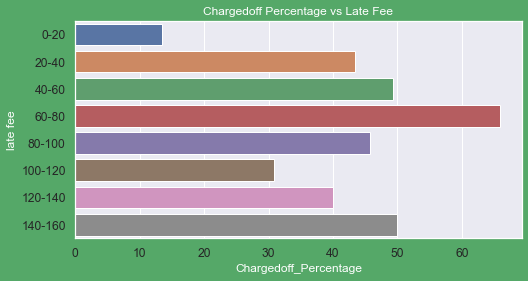

In [838]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('Chargedoff Percentage vs Late Fee',fontsize=12,color='w')
ax=sns.barplot(x='Chargedoff_Percentage', y='late_fee_range', data=late_fee_n_loan)
ax.set_xlabel('Chargedoff_Percentage',fontsize=12,color='w')
ax.set_ylabel('late fee',fontsize=12,color ='w')
plt.show()

#### Although the charged off percentage seemed to be more in the 60-80 category , it has again decrease after that, since there is no proper trend

#### Check the percentage of individuals in charged off having having a late fee

In [839]:
per_individual_charged_off_with_LF= (len(lcc[(lcc.total_rec_late_fee != 0) & (lcc.loan_status=="Charged Off")])/len(lcc[lcc.loan_status=="Charged Off"])) * 100
print(per_individual_charged_off_with_LF)

15.311604584527222


In [840]:
per_individual_fully_paid_with_LF= (len(lcc[(lcc.total_rec_late_fee != 0) & (lcc.loan_status=="Fully Paid")])/len(lcc[lcc.loan_status=="Fully Paid"]))*100
print(per_individual_fully_paid_with_LF)

3.41010150571928


In [841]:
late_fee_percentage_in_loan_status={'loan_status':['Charged Off','Fully Paid'], 'percent_of_individual_with_late_fee':[per_individual_charged_off_with_LF,per_individual_fully_paid_with_LF]}

In [842]:
lf_per_loan_status= pd.DataFrame(late_fee_percentage_in_loan_status)
lf_per_loan_status

,loan_status,percent_of_individual_with_late_fee
0,Charged Off,15.311605
1,Fully Paid,3.410102


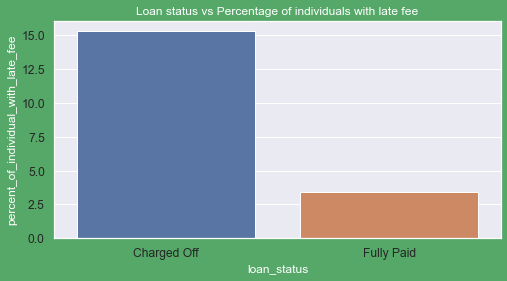

In [845]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('Loan status vs Percentage of individuals with late fee',fontsize=12,color='w')
ax=sns.barplot(x='loan_status', y='percent_of_individual_with_late_fee',data=lf_per_loan_status)
ax.set_xlabel('loan_status',fontsize=12,color='w')
ax.set_ylabel('percent_of_individual_with_late_fee',fontsize=12,color ='w')
plt.show()

#### From the above graph we can understand that in the charged off applicants 15% have a late fee as compared to the fully paid  having only 3% applicants with late fee so it can be an impacting variable

#### Analysing the impact of pub_rec_bankrupcies on loan status

In [846]:
lcc.pub_rec_bankruptcies.isnull().sum()

688

In [847]:
lcc.pub_rec_bankruptcies.fillna('No Info', inplace = True)

In [848]:
lcc.pub_rec_bankruptcies.isnull().sum()

0

In [849]:
pub_rec_bankruptcies_n_loan = lcc.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_n_loan['Total'] = pub_rec_bankruptcies_n_loan['Charged Off'] + pub_rec_bankruptcies_n_loan['Current'] + pub_rec_bankruptcies_n_loan['Fully Paid'] 
pub_rec_bankruptcies_n_loan['Chargedoff_Percentage'] = (pub_rec_bankruptcies_n_loan['Charged Off'] / pub_rec_bankruptcies_n_loan['Total'])*100

In [850]:
pub_rec_bankruptcies_n_loan.head()

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,0.0,5101.0,1087.0,30766.0,36954.0,13.803648
1,1.0,365.0,37.0,1268.0,1670.0,21.856287
2,2.0,2.0,2.0,3.0,7.0,28.571429
3,No Info,116.0,0.0,572.0,688.0,16.860465


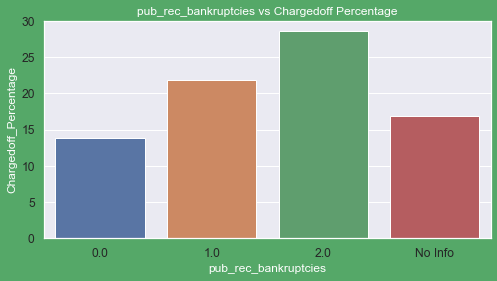

In [851]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('pub_rec_bankruptcies vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Percentage', data=pub_rec_bankruptcies_n_loan)
ax.set_xlabel('pub_rec_bankruptcies',fontsize=12,color='w')
ax.set_ylabel('Chargedoff_Percentage',fontsize=12,color ='w')
plt.show()

#### The pub_rec_bankruptcies seems to be increase for the charged off individuals

#### Analysing the impact of state on loan_status

In [852]:

state_n_loan = lcc.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_n_loan['Total'] = state_n_loan['Charged Off'] + state_n_loan['Current'] + state_n_loan['Fully Paid'] 
state_n_loan['Chargedoff_Percentage'] =(state_n_loan['Charged Off'] / state_n_loan['Total'])*100
state_n_loan.sort_values('Chargedoff_Percentage', ascending=False)



loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
28,NE,3.0,0.0,2.0,5.0,60.000000
32,NV,107.0,17.0,368.0,492.0,21.747967
40,SD,12.0,2.0,50.0,64.0,18.750000
0,AK,14.0,2.0,63.0,79.0,17.721519
9,FL,497.0,85.0,2252.0,2834.0,17.537050
24,MO,114.0,16.0,551.0,681.0,16.740088
13,ID,1.0,0.0,5.0,6.0,16.666667
31,NM,30.0,5.0,149.0,184.0,16.304348
11,HI,28.0,8.0,138.0,174.0,16.091954
4,CA,1116.0,149.0,5767.0,7032.0,15.870307


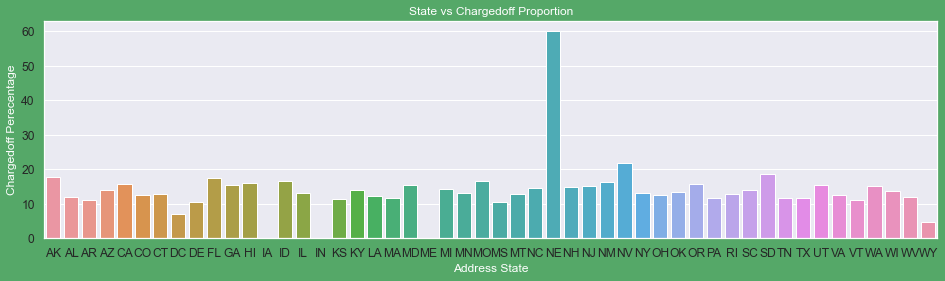

In [853]:
fig, ax = plt.subplots(figsize=(16, 4),facecolor='g')
ax.set_title('State vs Chargedoff Proportion',fontsize=12,color='w')
ax=sns.barplot(x='addr_state', y='Chargedoff_Percentage', data=state_n_loan)
ax.set_xlabel('Address State',fontsize=12,color='w')
ax.set_ylabel('Chargedoff Perecentage',fontsize=12,color = 'w')
plt.show()

#### From the above graph we can understand that a higher percentage of applicants who are charged off belongs to NE state

#### Analysing the impact of Int_rate on loan status and which interest rate range comprises of the highest percentage of charged off applicants

In [854]:
lcc['int_rate_range'] = pd.cut(lcc['int_rate'], [0,3,6,9,12,15,18,21,24,27], labels=['0-3','3-6', '6-9','9-12','12-15', '15-18','18-21', '21-24','24-27'])

In [855]:
int_rate_n_loan = lcc.groupby(['int_rate_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_n_loan['Total'] = int_rate_n_loan['Charged Off'] + int_rate_n_loan['Current'] + int_rate_n_loan['Fully Paid'] 
int_rate_n_loan['Chargedoff_Percentage'] = (int_rate_n_loan['Charged Off'] / int_rate_n_loan['Total'])*100


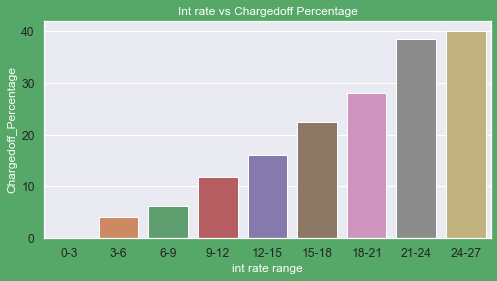

In [856]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('Int rate vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='int_rate_range', y='Chargedoff_Percentage', data=int_rate_n_loan)
ax.set_xlabel('int rate range',fontsize=12,color='w')
ax.set_ylabel('Chargedoff_Percentage',fontsize=12,color ='w')
plt.show()

#### The charged off percentage of applicants belonging to interest rate 24-27 is the highest and there is an increasing trend i.e the charged off percentag of applicants are increasing with the increase in interest rates

#### Analysing the impact of revol_util  on loan status and which revolving rate range comprises of the highest percentage of charged off applicants

In [857]:
lcc['revol_util_range'] = pd.cut(lcc['revol_util'], [0,10,20,30,40,50,60,70,80,90,100], labels=['0-10','10-20', '20-30','30-40','40-50', '50-60','60-70', '70-80','80-90','90-100'])

In [858]:
revol_util_rate_n_loan = lcc.groupby(['revol_util_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
revol_util_rate_n_loan['Total'] = revol_util_rate_n_loan['Charged Off'] + revol_util_rate_n_loan['Current'] + revol_util_rate_n_loan['Fully Paid'] 
revol_util_rate_n_loan['Chargedoff_Percentage'] = (revol_util_rate_n_loan['Charged Off'] / revol_util_rate_n_loan['Total'])*100

In [859]:
revol_util_rate_n_loan.head(2)

loan_status,revol_util_range,Charged Off,Current,Fully Paid,Total,Chargedoff_Percentage
0,0-10,289,63,3159,3511,8.231273
1,10-20,331,69,2959,3359,9.854123


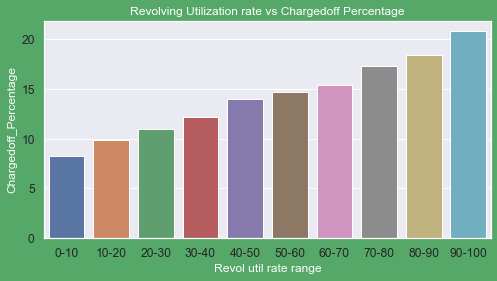

In [860]:
fig, ax = plt.subplots(figsize=(8, 4),facecolor='g')
ax.set_title('Revolving Utilization rate vs Chargedoff Percentage',fontsize=12,color='w')
ax=sns.barplot(x='revol_util_range', y='Chargedoff_Percentage', data=revol_util_rate_n_loan)
ax.set_xlabel('Revol util rate range',fontsize=12,color='w')
ax.set_ylabel('Chargedoff_Percentage',fontsize=12,color ='w')
plt.show()

#### The charged off percentage of applicants belonging to revolving utilization rate 90-100 is the highest and there is an increasing trend i.e the charged off percentage of applicants are increasing with the increase in revolving utilization rates

#### Bivariant analysis of Interest Rate and Term

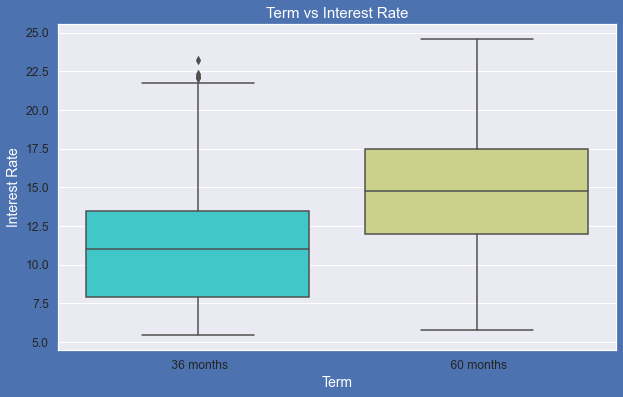

In [861]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =lcc,palette='rainbow')
ax.set_title('Term vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term',fontsize=14,color = 'w')
plt.show()


#### Interest rate of 60 months is more as compared to 36 months From above , since people with more interest rates are likely to be charged off, hence the individuals with loan payment term 60 months are likely to be charged off

In [862]:
lcc.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_inc_range,revolving_bal_range,late_fee_range,int_rate_range,revol_util_range
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0,0.00,0.00,Jan-15,171.62,May-16,0.0,20000-40000,10000-20000,0-20,9-12,80-90
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,20000-40000,0-10000,0-20,15-18,0-10
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0,0.00,0.00,Jun-14,649.91,May-16,0.0,0-20000,0-10000,0-20,15-18,90-100
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16,0.00,0.00,Jan-15,357.48,Apr-16,0.0,40000-60000,0-10000,0-20,12-15,20-30
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0,0.00,0.00,May-16,67.79,May-16,0.0,60000-80000,20000-30000,0-20,12-15,50-60


#### Analysing annual income across employment length with Loan status

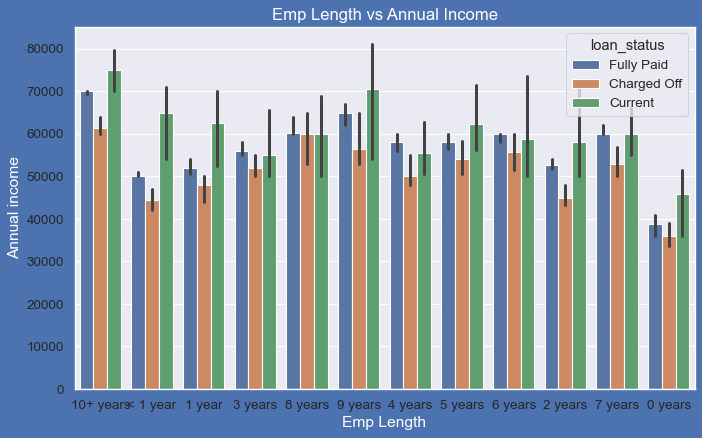

In [863]:
plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='g')
ax=sns.barplot(x='emp_length', y='annual_inc', hue="loan_status", data=lcc, estimator=np.median)
ax.set_title('Emp Length vs Annual Income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Emp Length',fontsize=14,color = 'w')
plt.show()

#### From the above graph we can infer that tha annual income of charged off applicants are lower as compared to Fully paid irrespective of the Employment length